In [ ]:
import numpy as np
from bc import *

out = mlp(initial_learning_rate=0.1, final_learning_rate=0.01,
         L1_reg=0.000, L2_reg=0.000, n_epochs=500, batch_size=200,
         n_hidden=1024, n_hiddenLayers=3, verbose=True, 
         stochastic=False, binary=True, which_data='mnist', 
         seedval=420, outputlayer='logistic', early_stopping=False)

Loading MNIST data...
Building the model...
Using Deterministic Binary Connect with Logistic Output Layer
... training
training @ iter =  0
training @ iter =  100
training @ iter =  200
epoch 1, minibatch 250/250, training error 90.910000 %, validation error 91.670000 %, test error 91.260000 %
training @ iter =  300
training @ iter =  400
epoch 2, minibatch 250/250, training error 85.760000 %, validation error 85.960000 %, test error 86.160000 %

In [4]:
print 'W'
print np.min(out.hiddenLayers[0].W.eval()), np.max(out.hiddenLayers[0].W.eval())
print 'Wb'
print np.min(out.hiddenLayers[0].Wb.eval()), np.max(out.hiddenLayers[0].Wb.eval())

W
-1.0 1.0
Wb
-1.0 1.0


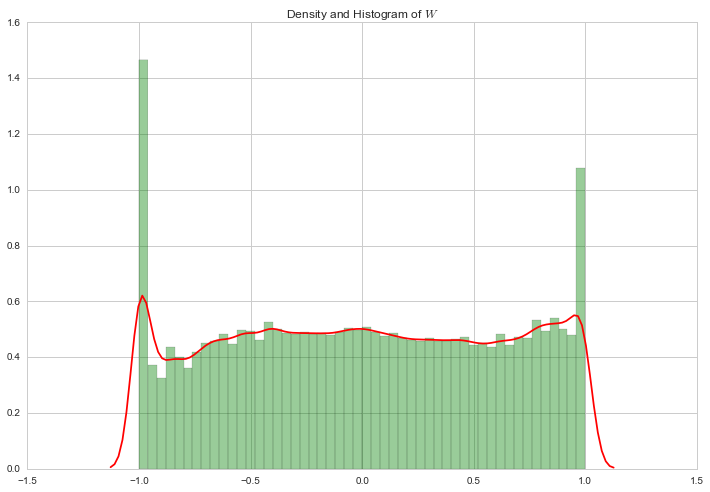

In [5]:
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

x = out.hiddenLayers[0].W.eval()
x = x.reshape(np.prod(x.shape))

plt.figure(figsize=(12,8))
plt.title('Density and Histogram of $W$')
sns.distplot(x, color='red', hist_kws={'color':'green'})
plt.show()